<a href="https://colab.research.google.com/github/rHangelbroek/PRA3024/blob/main/GW_LoadDataFiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Question 1a (Download data)

In [1]:
import sys
!{sys.executable} -m pip install pycbc ligo-common --no-cache-dir 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 KB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 KB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 164.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 246.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 KB 218.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!wget -nc https://dcc.ligo.org/public/0146/P1700349/001/H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf
!wget -nc https://dcc.ligo.org/public/0146/P1700349/001/L-L1_LOSC_CLN_4_V1-1187007040-2048.gwf

--2023-03-15 16:01:47--  https://dcc.ligo.org/public/0146/P1700349/001/H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf
Resolving dcc.ligo.org (dcc.ligo.org)... 131.215.125.144
Connecting to dcc.ligo.org (dcc.ligo.org)|131.215.125.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57824232 (55M)
Saving to: ‘H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf’

H-H1_LOSC_CLN_4_V1- 100%[===================>]  55.14M  31.5MB/s    in 1.8s    

2023-03-15 16:01:49 (31.5 MB/s) - ‘H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf’ saved [57824232/57824232]

--2023-03-15 16:01:49--  https://dcc.ligo.org/public/0146/P1700349/001/L-L1_LOSC_CLN_4_V1-1187007040-2048.gwf
Resolving dcc.ligo.org (dcc.ligo.org)... 131.215.125.144
Connecting to dcc.ligo.org (dcc.ligo.org)|131.215.125.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62070438 (59M)
Saving to: ‘L-L1_LOSC_CLN_4_V1-1187007040-2048.gwf’

L-L1_LOSC_CLN_4_V1- 100%[===================>]  59.19M  32.5MB/s    in 1.8s    

20

Sometimes the code gave an error saying a package was not imported eventhough they were. So some packages are added multiple times to the code to ensure it runs smoothly.

In [3]:
from __future__ import division

import numpy as np
import lal
import lalsimulation

import matplotlib.pyplot as plt
from scipy import interpolate
from numpy import pi, arange
from scipy import constants
from pycbc.conversions import *
from astropy import cosmology
from pycbc import waveform

from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
from pycbc.catalog import Merger
import pylab
from pycbc.types import  FrequencySeries, TimeSeries

from scipy import interpolate

from pycbc import frame
import pycbc
from pycbc.filter import resample_to_delta_t, highpass, matched_filter
import matplotlib.mlab as mlab
from scipy.stats import norm 
from pycbc.detector import Detector
from scipy.interpolate import interp1d

import pylab
from pycbc.filter import highpass
from pycbc.catalog import Merger
from pycbc.frame import read_frame


In [4]:
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
from pycbc.catalog import Merger
import pylab
from pycbc.types import  FrequencySeries, TimeSeries

from scipy import interpolate

import numpy as np
from pycbc import frame
import pycbc
from pycbc.filter import resample_to_delta_t, highpass
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm 
from pycbc.detector import Detector
from scipy.interpolate import interp1d

import numpy as np



###Question 1b (SNR over mass)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
d = np.load('/content/drive/MyDrive/PRA3024/GW_noisedata-2.npy') #name of the data file noise_ts_4096Hz.npy
dt = d[:, 0]
data_H1 = pycbc.types.TimeSeries(d[:, 1], delta_t = dt[1]- dt[0]) #this is to comvert data into GW timeSeries
data_L1 = pycbc.types.TimeSeries(d[:, 2], delta_t = dt[1]- dt[0]) #this is to comvert data into GW timeSeries

# comment out the merger since it no longer works
# merger = Merger("GW170817")
strain, stilde = {}, {}
strain['H1'] = resample_to_delta_t(highpass(data_H1, 15.0), 1.0/2048)
strain['L1'] = resample_to_delta_t(highpass(data_L1, 15.0), 1.0/2048)

strain['H1'] = strain['H1'].crop(4, 4)
strain['L1'] = strain['L1'].crop(4, 4)

stilde['H1'] = strain['H1'].to_frequencyseries()
stilde['L1'] = strain['L1'].to_frequencyseries()



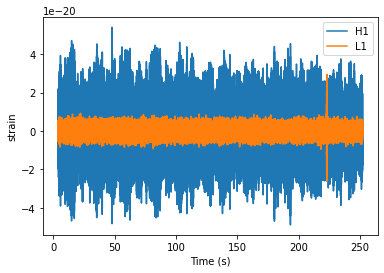

In [7]:
#print (strain.delta_t)
pylab.plot(strain['H1'].sample_times, strain['H1'], label= 'H1')
pylab.plot(strain['L1'].sample_times, strain['L1'], label= 'L1')
pylab.legend()
pylab.xlabel('Time (s)')
pylab.ylabel('strain')
pylab.show()


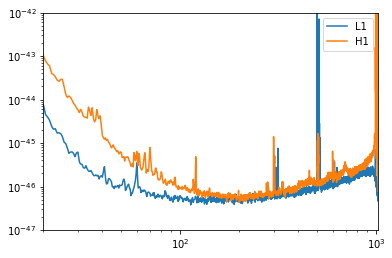

In [8]:
#calculate spectral density
#first plot the power spectral density of the data
#it is important to whiten the data or in order to find the SNR
import pycbc.psd
from pycbc.psd import interpolate

psds = {}
for ifo in ['L1', 'H1']:


    delta_t = strain[ifo].delta_t
    seg_len = int(2 / delta_t)
    seg_stride = int(seg_len / 2)
    psds[ifo]  = pycbc.psd.welch(strain[ifo],
                      seg_len=seg_len,
                      seg_stride=seg_stride)
    
    psds[ifo] = interpolate(psds[ifo], stilde[ifo].delta_f)

    pylab.loglog(psds[ifo].sample_frequencies, psds[ifo], label=ifo)
    pylab.xlim(20, 1024)
    pylab.ylim(1e-47, 1e-42)
pylab.legend()

In [9]:
#you can print the delta_f for the psd data itself
psds[ifo].delta_f

0.004032258064516129

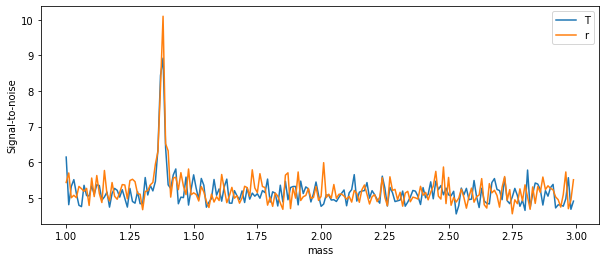

In [10]:
import pylab
from pycbc.waveform import get_td_waveform
from pycbc.waveform import get_fd_waveform #had to be added twice otherwise the code did not work
from pycbc.filter import matched_filter
from pycbc.conversions import mass1_from_mchirp_q
import numpy

# We will try different component masses and see which gives us the largest 
mass1 = numpy.arange(1, 3,0.01 ) #mass range bewteen 1 to 3 Solar mass and given a small stepsize of 0.01 for more accuracy
mass2 = mass1

# Variables to store when we've found the max
hmax, smax, tmax, mmax, nsnr = None, {}, {}, 0, 0
snrs = {}
ifo = 'H1'
Snr_list = []
for i in range(len(mass1)):
    #Generate a waveform with a given component mass; assumed equal mass, nonspinning
 
    m = mass1[i] # Solar masses
    hp, hc = get_td_waveform(approximant="TaylorT2", #'SEOBNRv4_opt' had to be changed to 'TaylorT2'
                     mass1=m,
                     mass2=m,
                     delta_t=strain[ifo].delta_t,
                     f_lower=30.0)

    # We will resize the vector to match our data
    hp.resize(len(strain[ifo]))
    template = hp.cyclic_time_shift(hp.start_time)
    
    snr = matched_filter(template, strain[ifo],
                     psd=psds[ifo], low_frequency_cutoff=15.0)

    # Remove time corrupted by the template filter and the psd filter
    # We remove 4 seonds at the beginning and end for the PSD filtering
    # And we remove 4 additional seconds at the beginning to account for
    # the template length (this is somewhat generous for 
    # so short a template). A longer signal such as from a BNS, would 
    # require much more padding at the beginning of the vector.
    snr_H1 = snr.crop(4 + 4, 4)


    Snr_list.append(max(abs(snr_H1)))
snrs[ifo] = Snr_list



ifo = 'L1'
Snr_list = []
for i in range(len(mass1)):
    #Generate a waveform with a given component mass; assumed equal mass, nonspinning
 
    m = mass1[i] # Solar masses
    hp, hc = get_td_waveform(approximant="TaylorT2",
                     mass1=m,
                     mass2=m,
                     delta_t=strain[ifo].delta_t,
                     f_lower=30.0)

    # We will resize the vector to match our data
    hp.resize(len(strain[ifo]))
    template = hp.cyclic_time_shift(hp.start_time)
    
    snr = matched_filter(template, strain[ifo],
                     psd=psds[ifo], low_frequency_cutoff=15.0)

    # Remove time corrupted by the template filter and the psd filter
    # We remove 4 seonds at the beginning and end for the PSD filtering
    # And we remove 4 additional seconds at the beginning to account for
    # the template length (this is somewhat generous for 
    # so short a template). A longer signal such as from a BNS, would 
    # require much more padding at the beginning of the vector.
    snr_H1 = snr.crop(4 + 4, 4)


    Snr_list.append(max(abs(snr_H1)))
snrs[ifo] = Snr_list

# Why am I taking an abs() here?
# The `matched_filter` function actually returns a 'complex' SNR.
# What that means is that the real portion correponds to the SNR
# associated with directly filtering the template with the data.
# The imaginary portion corresponds to filtering with a template that
# is 90 degrees out of phase. Since the phase of a signal may be 
# anything, we choose to maximize over the phase of the signal.
pylab.figure(figsize=[10, 4])
pylab.plot(mass1, snrs['H1'], label= 'H1')
pylab.plot(mass1, snrs['L1'], label= 'L1')
pylab.legend('True')
pylab.ylabel('Signal-to-noise')
pylab.xlabel('mass')
pylab.show()

For both L1 and H1 f_lower = 30.0 and low_frequency_cutoff = 15.0 with stepsize = 0.01 gave the best results. 

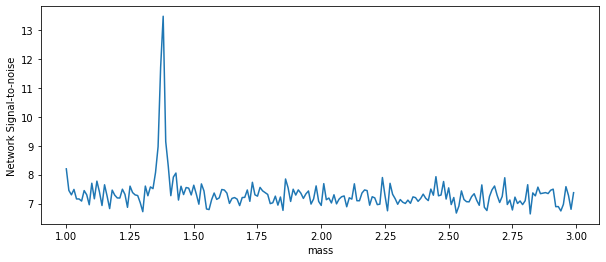

We found the best Mass1=Mass2 was 1.38 solar masses (detector frame)


In [11]:
nsnr = (numpy.array(snrs['H1'])**2 + numpy.array(snrs['L1'])**2)**0.5
ii = numpy.where(nsnr == max(nsnr))
pylab.figure(figsize=[10, 4])
pylab.plot(mass1, nsnr)

pylab.ylabel('Network Signal-to-noise')
pylab.xlabel('mass')
pylab.show()

print("The best Mass1=Mass2 was %2.2f solar masses (detector frame)" % mass1[ii])

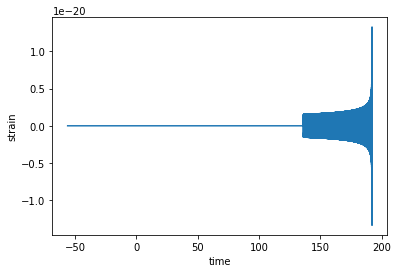

In [12]:
# In this case we "know" what the signal parameters are. In a search
# we would grid over the parameters and calculate the SNR time series
# for each one

# We'll assume equal masses, which is within the posterior probability
# of GW150914. 
m = 1.38 # Solar masses
conditioned = strain['H1']
hp, hc = get_td_waveform(approximant="TaylorT2",
                     mass1=m,
                     mass2=m,
                     delta_t=conditioned.delta_t,
                     f_lower=30.0) 

# We will resize the vector to match our data
hp.resize(len(conditioned))

# The waveform begins at the start of the vector, so if we want the
# SNR time series to correspond to the approximate merger location
# we need to shift the data so that the merger is approximately at the 
# first bin of the data.

# This function rotates the vector by a fixed amount of time.
# It treats the data as if it were on a ring. Note that
# time stamps are *not* in general affected, but the true
# position in the vector is.
#
# By convention waveforms returned from `get_td_waveform` have their
# merger stamped with time zero, so we can use the start time to 
# shift the merger into position
template = hp .cyclic_time_shift(hp.start_time)
pylab.plot(hp.sample_times, template)
pylab.xlabel('time')
pylab.ylabel('strain')
pylab.show()

f_lower=30.0 is the same as for the previous graph

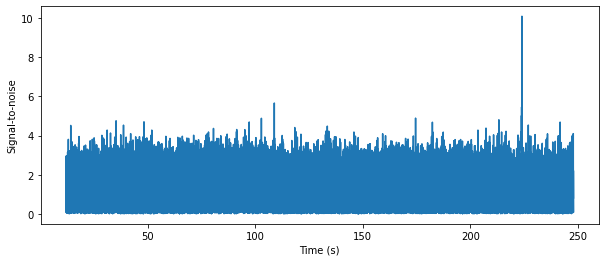

We found a signal at 224.0244140625s with SNR 10.096137086957164


In [13]:
from pycbc.filter import matched_filter
import numpy

ifo = 'L1'                            
conditioned = strain[ifo]
snr = matched_filter(template, conditioned,
                     psd=psds[ifo] , low_frequency_cutoff=15)

# Remove time corrupted by the template filter and the psd filter
# We remove 4 seonds at the beginning and end for the PSD filtering
# And we remove 4 additional seconds at the beginning to account for
# the template length (this is somewhat generous for 
# so short a template). A longer signal such as from a BNS, would 
# require much more padding at the beginning of the vector.
snr = snr.crop(4 + 4, 4)

# Why am I taking an abs() here?
# The `matched_filter` function actually returns a 'complex' SNR.
# What that means is that the real portion correponds to the SNR
# associated with directly filtering the template with the data.
# The imaginary portion corresponds to filtering with a template that
# is 90 degrees out of phase. Since the phase of a signal may be 
# anything, we choose to maximize over the phase of the signal.
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("A signal was found at {}s with SNR {}".format(time, 
                                                    abs(snrp)))


In [14]:
from pycbc.filter import sigma
# The time, amplitude, and phase of the SNR peak tell us how to align
# our proposed signal with the data.

# Shift the template to the peak time
dt = time - conditioned.start_time
aligned = template.cyclic_time_shift(dt)

# scale the template so that it would have SNR 1 in this data
aligned /= sigma(aligned, psd=psds[ifo], low_frequency_cutoff=15.0)

# Scale the template amplitude and phase to the peak value
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries()
aligned.start_time = conditioned.start_time

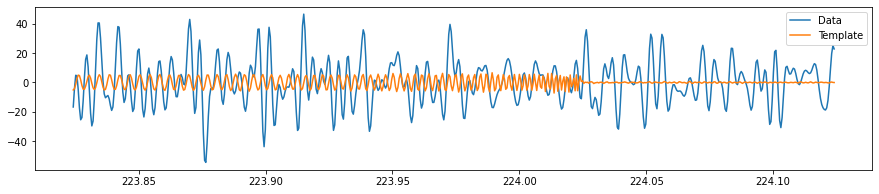

In [15]:
# We do it this way so that we can whiten both the template and the data
white_data = (conditioned.to_frequencyseries() / psds[ifo]**0.5).to_timeseries()

# apply a smoothing of the turnon of the template to avoid a transient
# from the sharp turn on in the waveform.
tapered = aligned.highpass_fir(30, 512, remove_corrupted=False)
white_template = (tapered.to_frequencyseries() / psds[ifo]**0.5).to_timeseries()

white_data = white_data.highpass_fir(30., 512).lowpass_fir(300, 512)
#white_template = white_template.highpass_fir(30, 512).lowpass_fir(300, 512)

# Select the time around the merger
#NOTE: merger did not work so the sample time is used
white_data = white_data.time_slice(snr.sample_times[peak]-.2, snr.sample_times[peak]+.1)
white_template = white_template.time_slice(snr.sample_times[peak]-.2, snr.sample_times[peak]+.1)

pylab.figure(figsize=[15, 3])
pylab.plot(white_data.sample_times, white_data, label="Data")
pylab.plot(white_template.sample_times, white_template, label="Template")
pylab.legend()
pylab.show()

The template does not seem to fit the generated wave and also stops after aproximately 0.43. Because of this the Q-transform will most probably not work.

In the example the merger was used. However, that did not work so the snr.sample_times[peak] was used.

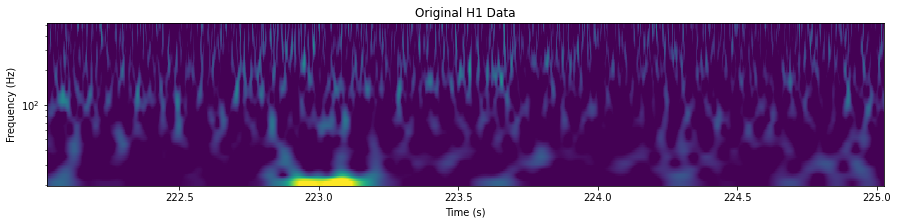

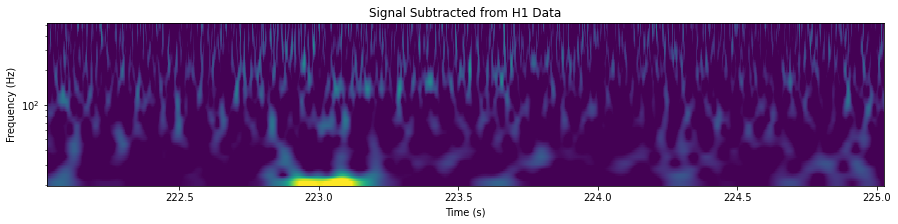

In [16]:
subtracted = conditioned - aligned

# Plot the original data and the subtracted signal data

for data, title in [(conditioned, 'Original H1 Data'),
                    (subtracted, 'Signal Subtracted from H1 Data')]:

    t, f, p = data.whiten(4, 4).qtransform(.001,
                                                  logfsteps=100,
                                                  qrange=(8, 8),
                                                  frange=(20, 512))
    pylab.figure(figsize=[15, 3])
    pylab.title(title)
    pylab.pcolormesh(t, f, p**0.5, vmin=1, vmax=6)
    pylab.yscale('log')
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(snr.sample_times[peak] - 2, snr.sample_times[peak] + 1)
    pylab.show()


The hypothesis that the Q-transform will not work seems to be correct. The reason why it does not work is because the template is not simmilar/overlaps the actual signal.

### Question 1c (calculate the match between h* and h_t and plot against mass)

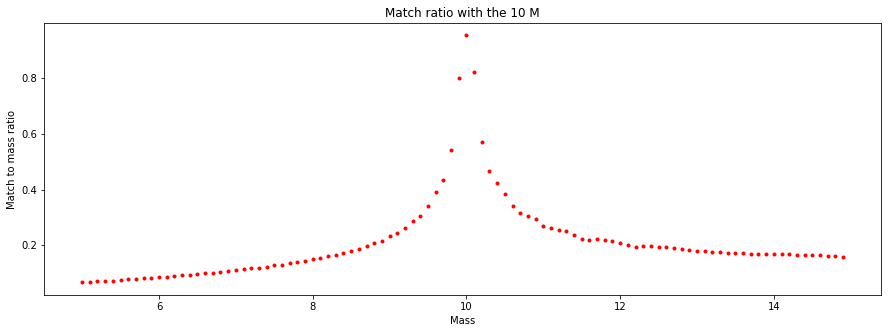

In [28]:
from pycbc.waveform import get_td_waveform
from pycbc.filter import match
from pycbc.psd import aLIGOZeroDetHighPower

# Again de f_low = 30 was used
f_low = 30
sample_rate = 4096
masses = arange(5,15,0.1) # Masses between 5 and 15 and a stepsize of 0.1
matches = {}

for mass in masses:
  # Generating of two waveforms - they will be later compared to each other
  hp, hc = get_td_waveform(approximant="EOBNRv2",
                          mass1=10,
                          mass2=10,
                          f_lower=f_low,
                          delta_t=1.0/sample_rate)

  sp, sc = get_td_waveform(approximant="TaylorT4",
                          mass1=mass,
                          mass2=mass,
                          f_lower=f_low,
                          delta_t=1.0/sample_rate)

  # Making the waveforms the same length
  tlen = max(len(sp), len(hp))
  sp.resize(tlen)
  hp.resize(tlen)

  # Generating the aLIGO ZDHP PSD
  delta_f = 1.0 / sp.duration
  flen = tlen//2 + 1
  psd = aLIGOZeroDetHighPower(flen, delta_f, f_low)

  #Comparing the waveforms
  m, i = match(hp, sp, psd=psd, low_frequency_cutoff=f_low)
  matches[mass]=m

pylab.figure(figsize=[15, 5])
pylab.title("Match ratio with the 10 M")
pylab.ylabel('Match to mass ratio')
pylab.xlabel('Mass')
pylab.plot(*zip(*matches.items()),'r.')
pylab.show()
     

The match ratio is almost at 1 for 10 M, which is also expected.

### Question 2a

In [19]:
#taken form LoadData
d = numpy.load('/content/drive/MyDrive/PRA3024/noise_ts_4096Hz.npy')# Name of the data file noise_ts_4096Hz.npy
dt = d[:, 0]
d = pycbc.types.TimeSeries(d[:, 1], delta_t = dt[1]- dt[0]) # Comvert data into GW timeSeries
data = d

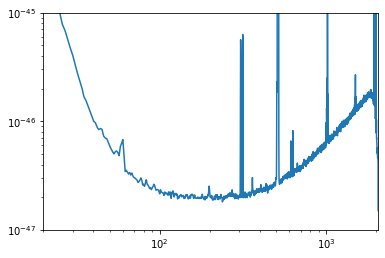

In [20]:
# Generate a graph of the data to see if there are any potential SNR peaks
psds = interpolate(welch(d), 1.0 / d.duration)

pylab.loglog(psds.sample_frequencies, psds)
pylab.xlim(20, max(psds.sample_frequencies))
pylab.ylim(1e-47, 1e-45)
pylab.show()

In [29]:
flow = 30
stilde = data.to_frequencyseries()
# Create list of masses from 5 to 10 M and a stepsize of 0.5
masses = arange(5,11,0.5) 

# Go through the different masses and make a waveform for all and resize them
for mass in masses:
  hp, hc = pycbc.waveform.get_fd_waveform(approximant="TaylorF2",
                             mass1=mass, mass2=mass, f_lower=flow, delta_f=stilde.delta_f)
  hp.resize(len(stilde)) 

  # Calculating the SNR
  # Filter wraparround corrupts the first and last 4 seconds of the data so these need to be removed
  snr = pycbc.filter.matched_filter(hp, stilde, psd=psds, low_frequency_cutoff=flow)
  snr = snr[len(snr) // 4: len(snr) * 3 // 4]
  
  # Check if a GW (SNR>8 can be found)
  peak = abs(snr).numpy().argmax()
  snrp = snr[peak]
  if(snrp > 8):
    print('The equal masses of {} give an SNR greater that 8 in {}'.format(mass, abs(snrp)) )
  else:
    print('No SNR greater that 8 was detected. The maximal SNR at the mass of {} was {}'.format(mass, abs(snrp)))


No SNR greater that 8 was detected. The maximal SNR at the mass of 5.0 was 5.215898227753394
No SNR greater that 8 was detected. The maximal SNR at the mass of 5.5 was 5.163342557960255
No SNR greater that 8 was detected. The maximal SNR at the mass of 6.0 was 5.100876352707748
No SNR greater that 8 was detected. The maximal SNR at the mass of 6.5 was 5.685732063762449
No SNR greater that 8 was detected. The maximal SNR at the mass of 7.0 was 5.0923126023267535
No SNR greater that 8 was detected. The maximal SNR at the mass of 7.5 was 4.7982727525540065
No SNR greater that 8 was detected. The maximal SNR at the mass of 8.0 was 5.934813524398827
No SNR greater that 8 was detected. The maximal SNR at the mass of 8.5 was 5.565712665104548
No SNR greater that 8 was detected. The maximal SNR at the mass of 9.0 was 5.664784687731557
No SNR greater that 8 was detected. The maximal SNR at the mass of 9.5 was 5.877522005628215
No SNR greater that 8 was detected. The maximal SNR at the mass of 1

There is no SNR greater than 8 detected so there is only noise.

###Question 2b

In [22]:
# We do it this way so that we can whiten both the template and the data
import pycbc.psd
white_data = (data.to_frequencyseries() / psds**0.5).to_timeseries()
white_data = white_data.crop(4,4) # Again for the wraparound it needs to be cropped

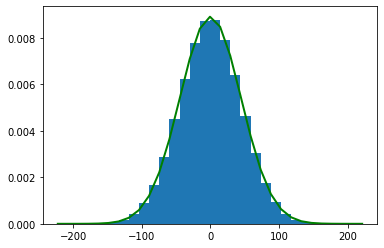

In [41]:
# Plotting the histogram using the statistics library
import statistics

mu, sigma, shape = statistics.mean(white_data), statistics.stdev(white_data), white_data.shape[0] # mean, standard deviation, shape
s = np.random.normal(mu, sigma, shape)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='g')
plt.show()

###Question 2c

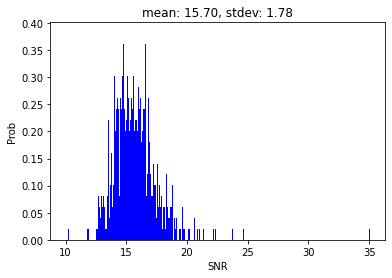

In [58]:
#  Creating the wave form using statistics library
from statistics import mean, stdev

hp, hc = get_fd_waveform(approximant="TaylorF2",
                         mass1=3, 
                         mass2=3,
                         delta_f=1.0/(200.0) ,
                         distance = 500,
                         f_lower=20.0, f_final = 2048.0) #Luminosity distance = 500 Mp

# Slice data and create SNRlist
data_slice = int(len(data)/1000)
SNRlist = []

# Go through slices and approximate psd for all
for i in range(0, 1000):
  data_chunk = data[i * data_slice: (i+1)*data_slice]
  psds = pycbc.psd.interpolate(pycbc.psd.welch(data_chunk), hp.delta_f)
  SNR = (pycbc.filter.sigmasq(hp, psds))**0.5
  SNRlist.append(SNR)
  
# Plot histogram and the best fit
plt.hist(SNRlist, bins = 500, color = "Blue", density=True)
mu, sigma = mean(SNRlist), stdev(SNRlist)
y = norm.pdf(10, mu, sigma)
plt.plot(10, y)
plt.title('mean: {:.2f}, stdev: {:.2f}'.format(mu, sigma))
plt.xlabel("SNR")
plt.ylabel("Prob")
plt.show()

There is no Gaussian distribution present

###Question 3a